### Data Set Information:

This archive contains 2075259 measurements gathered in a house located in Sceaux (7km of Paris, France) between December 2006 and November 2010 (47 months).

1. (global_active_power*1000/60 - sub_metering_1 - sub_metering_2 - sub_metering_3) represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3.
2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

The dataset can be accessed here: https://archive.ics.uci.edu/ml/datasets/individual+household+electric+power+consumption

### Attribute Information:

1. date: Date in format dd/mm/yyyy
2. time: time in format hh:mm:ss
3. global_active_power: household global minute-averaged active power (in kilowatt)
4. global_reactive_power: household global minute-averaged reactive power (in kilowatt)
5. voltage: minute-averaged voltage (in volt)
6. global_intensity: household global minute-averaged current intensity (in ampere)
7. sub_metering_1: energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
8. sub_metering_2: energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
9. sub_metering_3: energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

In [56]:
#Importing all necessary libraries

#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and 
#matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
import numpy as np

#Pandas is a software library written for the Python programming language for data manipulation and analysis. 
#In particular, it offers data structures and operations for manipulating numerical tables and time series. 
import pandas as pd 

#Seaborn is a Python data visualization library based on matplotlib
#It provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns 

#Matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. 
#It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits
import matplotlib.pyplot as plt 

In [2]:
# Creating dataset from available data
# read_csv: Read a comma-separated values (csv) file into DataFrame.

dataset = pd.read_csv("household_power_consumption.txt", sep=';', header=0, infer_datetime_format=True, parse_dates={'datetime':[0,1]}, index_col=['datetime'])

C:\Users\shubh\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
#Display top 5 rows

dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
2006-12-16 17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2006-12-16 17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
2006-12-16 17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
2006-12-16 17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [4]:
#Display bottom 5 rows

dataset.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2010-11-26 20:58:00,0.946,0,240.43,4,0,0,0.0
2010-11-26 20:59:00,0.944,0,240,4,0,0,0.0
2010-11-26 21:00:00,0.938,0,239.82,3.8,0,0,0.0
2010-11-26 21:01:00,0.934,0,239.7,3.8,0,0,0.0
2010-11-26 21:02:00,0.932,0,239.55,3.8,0,0,0.0


In [5]:
#Print no. of rows and columns in dataframe

print(f"The Dataset has {dataset.shape[0]} rows and {dataset.shape[1]} columns")

The Dataset has 2075259 rows and 7 columns


In [6]:
#Print column names

dataset.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')

In [7]:
#Print all details of dataframe (not rows)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [8]:
#Find count of missing values column wise

dataset.isnull().sum()

Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [9]:
#Create a new dataframe which stores the percentage of missing values per column

percent_missing = dataset.isnull().sum() * 100 / len(dataset)
missing_value_df = pd.DataFrame({'percent_missing': percent_missing})

In [10]:
#Display new dataframe

missing_value_df

,percent_missing
Global_active_power,0.000000
Global_reactive_power,0.000000
Voltage,0.000000
Global_intensity,0.000000
Sub_metering_1,0.000000
Sub_metering_2,0.000000
Sub_metering_3,1.251844


In [11]:
#If any value in the row is NA, remove the entire row

dataset1 = dataset.dropna(how = 'any')

In [12]:
#Determine number of rows and columns in new dataframe formed

dataset1.shape

(2049280, 7)

In [13]:
#Show the top 5 rows where the Sub_metering_3 column is NA

dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,?,?,?,?,?,?,NaN
2006-12-21 11:24:00,?,?,?,?,?,?,NaN
2006-12-30 10:08:00,?,?,?,?,?,?,NaN
2006-12-30 10:09:00,?,?,?,?,?,?,NaN
2007-01-14 18:36:00,?,?,?,?,?,?,NaN


In [14]:
#Replace all ? with NA. 
#This is useful in cases when you know the origin of the data and can be certain which values should be missing.

dataset.replace('?', np.nan, inplace=True)

In [15]:
#Check if the changes are reflected

dataset.loc[dataset.Sub_metering_3.isnull()].head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
#If all values in the row are NA, remove the entire row

dataset = dataset.dropna(how = 'all')

In [17]:
#astype() method is used to cast a pandas object to a specified dtype. 
#astype() function also provides the capability to convert any suitable existing column to categorical type.

for i in dataset.columns:
    dataset[i] = dataset[i].astype('float64')

In [18]:
#Check the new size of database

dataset.shape

(2049280, 7)

In [57]:
dataset

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
datetime,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000
...,...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,15.766667
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,15.733333
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,15.633333


## Electrical Submetering

Electrical submetering involves the installation power meters (also called power monitors, electrical meters, or energy monitors) that can measure energy usage after it reaches the primary utility meter. Submetering offers the ability to monitor energy usage for individual tenants, departments, pieces of equipment or other loads to account for their actual energy usage.

In [19]:
# add a column for for the remainder of sub metering

values = dataset.values
dataset['sub_metering_4'] = (values[:,0] * 1000 / 60) - (values[:,4] + values[:,5] + values[:,6])

In [20]:
#Checking if astype() function worked

dataset.dtypes

Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
sub_metering_4           float64
dtype: object

In [21]:
#Describe() function:
#Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s 
#distribution, excluding NaN values.

dataset.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


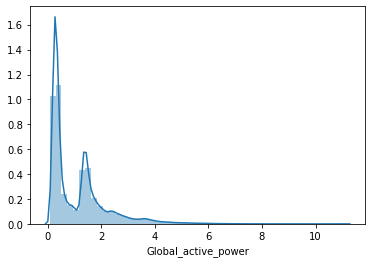

In [22]:
#A distplot plots a univariate distribution of observations. The distplot() function combines the matplotlib hist 
#function with the seaborn kdeplot() and rugplot() functions.
#Read more: https://seaborn.pydata.org/generated/seaborn.distplot.html

sns.distplot(dataset['Global_active_power'])

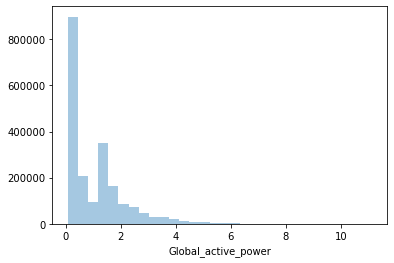

In [23]:
#Don't plot a gaussian kernel density estimate with bins=30

sns.distplot(dataset['Global_active_power'],kde=False,bins=30)

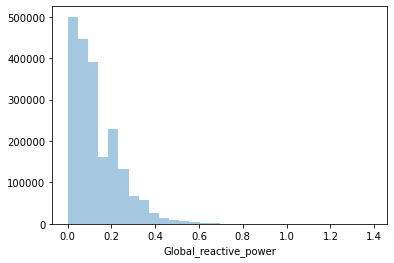

In [24]:
#Plot for Global_reactive_power

sns.distplot(dataset['Global_reactive_power'],kde=False,bins=30)

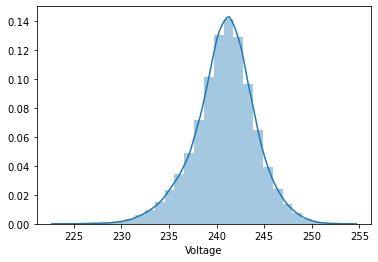

In [25]:
#Plot for Voltage

sns.distplot(dataset['Voltage'],kde=True,bins=30)

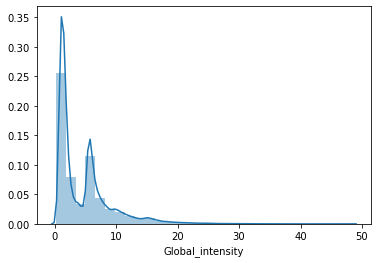

In [26]:
#Plot for Global_intensity

sns.distplot(dataset['Global_intensity'],kde=True,bins=30)

In [27]:
#corr() is used to find the pairwise correlation of all columns in the dataframe. 
#Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored

dataset.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555,0.701380
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617,0.211624
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172,-0.271371
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543,0.703258
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571,0.125067
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872,0.085201
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000,0.178724
sub_metering_4,0.701380,0.211624,-0.271371,0.703258,0.125067,0.085201,0.178724,1.000000


## Pearson's correlation

Pearson’s correlation (also called Pearson’s R) is a correlation coefficient commonly used in linear regression. <br>
Read more: https://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/

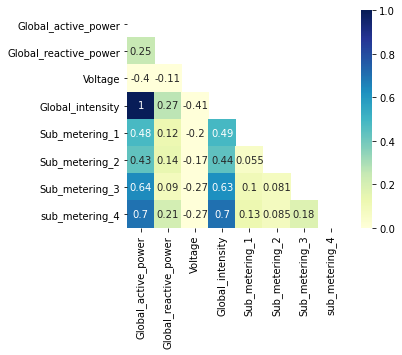

In [28]:
pearson = dataset.corr(method='pearson')
mask = np.zeros_like(pearson)
mask[np.triu_indices_from(mask)] = True

#A heat map is data analysis software that uses color the way a bar graph uses height and width: as a data visualization tool.
sns.heatmap(pearson, vmax=1, vmin=0, square=True, cbar=True, annot=True, cmap="YlGnBu", mask=mask);

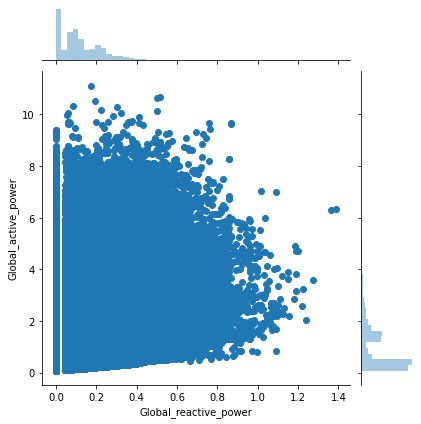

In [29]:
#Seaborn's jointplot displays a relationship between 2 variables (bivariate) as well as 1D profiles (univariate) in the margins.
#Plot Global_reactive_power vs Global_active_power

sns.jointplot( x = 'Global_reactive_power' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

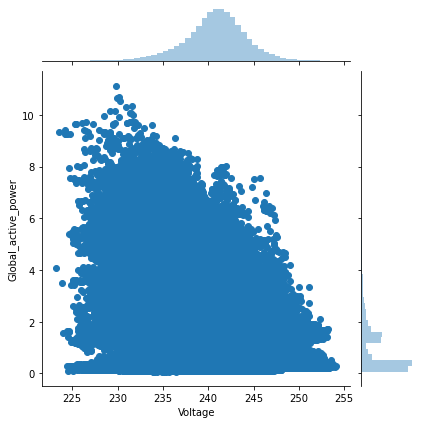

In [30]:
#Plot Voltage vs Global_active_power

sns.jointplot( x = 'Voltage' , y = 'Global_active_power' , data = dataset , kind = 'scatter')


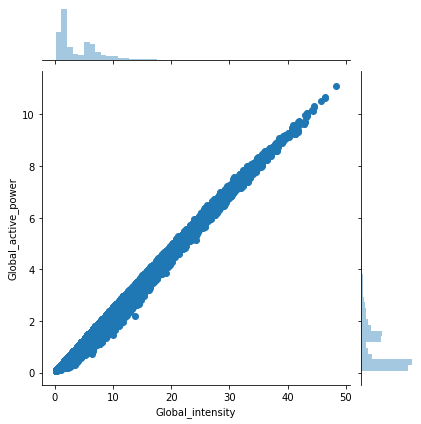

In [31]:
#Plot Global_intensity vs Global_active_power

sns.jointplot( x = 'Global_intensity' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

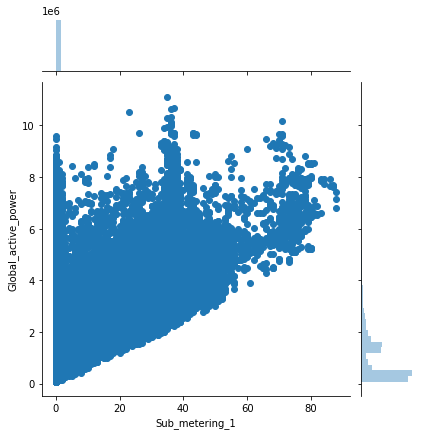

In [32]:
#Plot Sub_metering_1 vs Global_active_power

sns.jointplot( x = 'Sub_metering_1' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

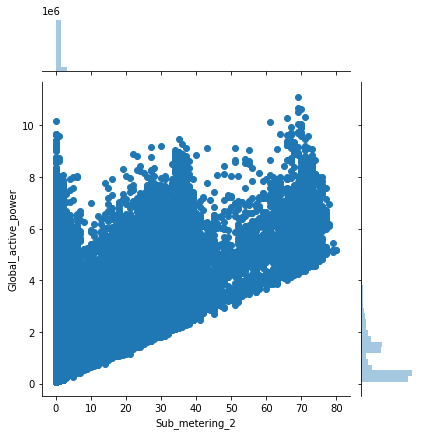

In [33]:
#Plot Sub_metering_2 vs Global_active_power

sns.jointplot( x = 'Sub_metering_2' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

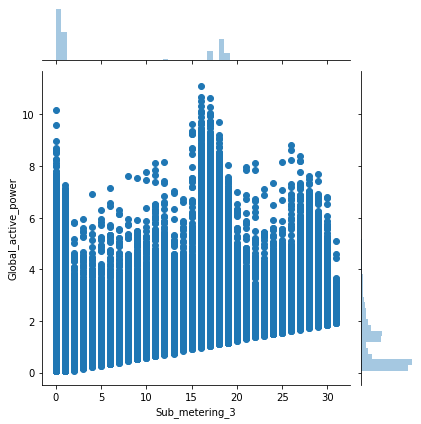

In [34]:
#Plot Sub_metering_3 vs Global_active_power

sns.jointplot( x = 'Sub_metering_3' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

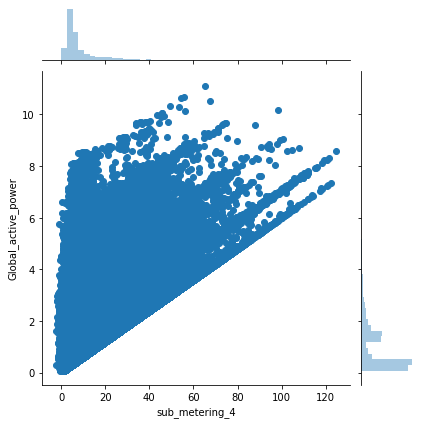

In [35]:
#Plot sub_metering_4 vs Global_active_power

sns.jointplot( x = 'sub_metering_4' , y = 'Global_active_power' , data = dataset , kind = 'scatter')

In [36]:
#Segregating into 2 dataframes 
X = dataset.iloc[:,[1,3,4,5,6]]
y = dataset.iloc[:,0]

In [37]:
X.head()

,Global_reactive_power,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,
2006-12-16 17:24:00,0.418,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,0.436,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,0.498,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,0.502,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,0.528,15.8,0.0,1.0,17.0


In [38]:
y.head()

datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
Name: Global_active_power, dtype: float64

In [39]:
type(X)

pandas.core.frame.DataFrame

In [40]:
type(y)

pandas.core.series.Series

In [41]:
#Library used to split arrays or matrices into random train and test subsets

from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1434496, 5)
(614784, 5)
(1434496,)
(614784,)


In [44]:
#LinearRegression fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between 
#the observed targets in the dataset, and the targets predicted by the linear approximation.

from sklearn.linear_model import LinearRegression

In [45]:
lm = LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression()

In [47]:
#Coefficient of the features in the decision function.

print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.17597046  0.23668058 -0.00029877 -0.00040084  0.00216141]


In [48]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

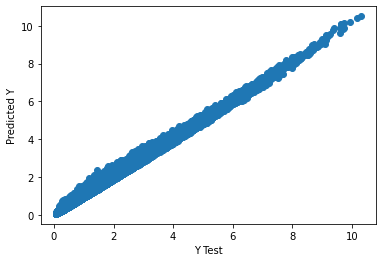

In [49]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [50]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print ('R Squares value:',metrics.r2_score(y_test, predictions))

MAE: 0.027455608456450318
MSE: 0.0018226463072696989
RMSE: 0.0426924619490338
R Squares value: 0.9983631695586828


In [51]:
#Lasso regression is a type of linear regression that uses shrinkage. 
#Shrinkage is where data values are shrunk towards a central point, like the mean. 
#Read more: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

from sklearn.linear_model import Lasso

In [52]:
best_alpha = 0.00099

regr = Lasso(alpha=best_alpha, max_iter=50000)
regr.fit(X_train,y_train)

Lasso(alpha=0.00099, max_iter=50000)

In [53]:
lasso_pred = lm.predict(X_test)

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test,lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test,lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lasso_pred)))
print ('R Squares value:',metrics.r2_score(y_test,lasso_pred))

MAE: 0.027455608456450318
MSE: 0.0018226463072696989
RMSE: 0.0426924619490338
R Squares value: 0.9983631695586828
